# Breast Cancer - **part 2: PCA, t-SNE**

## **0.** Settings

In [147]:
# Libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# No warnings (seaborn)
import warnings
warnings.filterwarnings("ignore")

## **1.** Dataset

In [ ]:
'''

    DATASET INFORMATIONS

    |------------------------|------------|------------------------------------------------------------------|
    | Name                   | Data Type  | Description                                                      |
    |------------------------|------------|------------------------------------------------------------------|
    | id                     | nominal    | ID number                                                        |
    | diagnosis              | nominal    | (target) M = malignant, B = benign                               |
    | radius_mean            | continuous | radius: mean of distances from center to points on the perimeter |
    | texture_mean           | continuous | texture: standard deviation of gray-scale values                 |
    | perimeter_mean         | continuous | perimeter                                                        |
    | area_mean              | continuous | area                                                             |
    | smoothness_mean        | continuous | smoothness: local variation in radius lengths                    |
    | compactness_mean       | continuous | compactness: perimeter^2 / area - 1.0                            |
    | concavity_mean         | continuous | concavity: severity of concave portions of the contour           |
    | concave points_mean    | continuous | concave points: number of concave portions of the contour        |
    | symmetry_mean          | continuous | symmetry                                                         |
    | fractal_dimension_mean | continuous | fractal dimension: coastline approximation - 1                   |
    |------------------------|------------|------------------------------------------------------------------|

'''

In [2]:
# Import the dataset
data = pd.read_csv('./breast.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.columns[1:12]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [5]:
# We'll consider only the 'mean' features
data = data[data.columns[1:12]]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


## **2.** Data preprocessing

In [7]:
# Null elements
data.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [8]:
data.isnull().any()

diagnosis                 False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
dtype: bool

In [9]:
# Encoding of the target:
data['diagnosis'].replace(to_replace=['B', 'M'], value=[0, 1], inplace=True)

In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## **3.** PCA

### **3.1.** PCA fit

In [11]:
# Extract only the features
features = data[list(data.columns)[1:12]]
features.columns

# Equivalently (more fast)
features = data.drop('diagnosis', axis=1)
features.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [15]:
# Standardize the features
feat_std = (features - features.mean())/(features.std())

# Define and fit the PCA
pca = PCA(n_components = len(features.columns))
pca.fit(feat_std);

### **3.2.** PCA weights

In [20]:
# Principal components vectors
# Every row is a vector (every element of the vector is the weight associated to a particular feature)
pca_components = pd.DataFrame(data = pca.components_, columns=features.columns)
pca_components

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.363938,0.154451,0.376044,0.364086,0.232481,0.364442,0.395748,0.418038,0.215238,0.071837
1,-0.313929,-0.147181,-0.284658,-0.304842,0.401962,0.266013,0.104286,0.007184,0.368301,0.571768
2,-0.124428,0.951057,-0.114084,-0.123378,-0.166532,0.058278,0.041146,-0.068554,0.036724,0.113584
3,0.029559,0.008916,0.013458,0.013443,-0.107802,-0.185700,-0.166654,-0.072984,0.892998,-0.349332
4,-0.031067,-0.219923,-0.005945,-0.019341,-0.843745,0.240183,0.312533,-0.009180,0.112888,0.264878
5,-0.264180,-0.032207,-0.237819,-0.331707,0.062225,0.005271,0.601467,0.265613,-0.061957,-0.567919
6,-0.044188,0.020557,-0.083369,0.261188,0.011292,-0.803805,0.367136,0.141313,0.047902,0.345214
7,0.084834,-0.007127,0.089259,0.144610,0.170503,0.063980,0.449573,-0.850919,0.016456,-0.065259
8,-0.474425,-0.004213,-0.380167,0.747347,-0.005847,0.218732,-0.081171,0.022025,-0.009068,-0.129667
9,-0.669071,0.000250,0.740491,-0.032359,0.003690,-0.052753,-0.010367,-0.003748,0.001467,0.007057


In [21]:
# View as 'columns = PC vectors':
pca_components.T

,0,1,2,3,4,5,6,7,8,9
radius_mean,0.363938,-0.313929,-0.124428,0.029559,-0.031067,-0.264180,-0.044188,0.084834,-0.474425,-0.669071
texture_mean,0.154451,-0.147181,0.951057,0.008916,-0.219923,-0.032207,0.020557,-0.007127,-0.004213,0.000250
perimeter_mean,0.376044,-0.284658,-0.114084,0.013458,-0.005945,-0.237819,-0.083369,0.089259,-0.380167,0.740491
area_mean,0.364086,-0.304842,-0.123378,0.013443,-0.019341,-0.331707,0.261188,0.144610,0.747347,-0.032359
smoothness_mean,0.232481,0.401962,-0.166532,-0.107802,-0.843745,0.062225,0.011292,0.170503,-0.005847,0.003690
compactness_mean,0.364442,0.266013,0.058278,-0.185700,0.240183,0.005271,-0.803805,0.063980,0.218732,-0.052753
concavity_mean,0.395748,0.104286,0.041146,-0.166654,0.312533,0.601467,0.367136,0.449573,-0.081171,-0.010367
concave points_mean,0.418038,0.007184,-0.068554,-0.072984,-0.009180,0.265613,0.141313,-0.850919,0.022025,-0.003748
symmetry_mean,0.215238,0.368301,0.036724,0.892998,0.112888,-0.061957,0.047902,0.016456,-0.009068,0.001467
fractal_dimension_mean,0.071837,0.571768,0.113584,-0.349332,0.264878,-0.567919,0.345214,-0.065259,-0.129667,0.007057


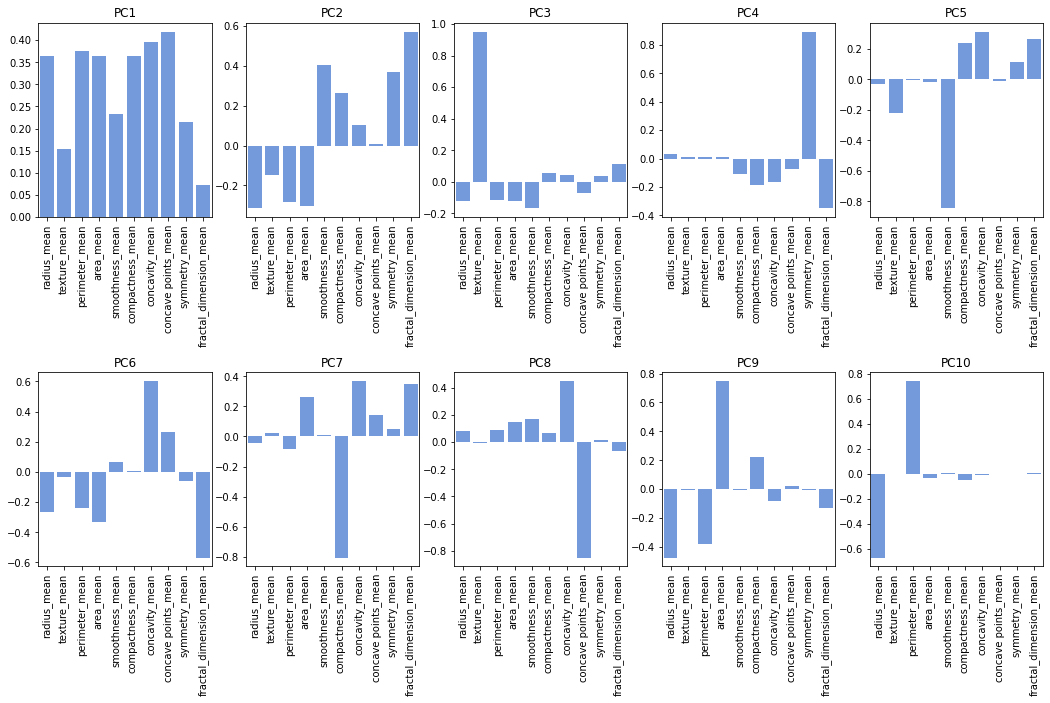

In [53]:
# Let's visualize the weights
plt.figure(figsize=(18, 10))

n_row=2
n_col=5

for i in range(len(features.columns)):
    plt.subplot(n_row, n_col, i+1)
    sns.barplot(data=pca_components[i:(i+1)], color='cornflowerblue');
    plt.title(f'PC{i+1}')
    plt.xticks(rotation=90);

plt.subplots_adjust(hspace=.8);

### **3.3.** Explained variance

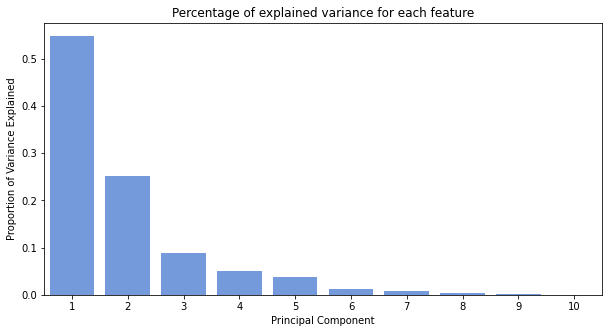

In [116]:
# PCA variance explaination
explained_var = pca.explained_variance_ratio_
indeces = np.arange(1, len(explained_var)+1)

plt.figure(figsize=(10,5));
sns.barplot(indeces, explained_var, color='cornflowerblue');
plt.title('Percentage of explained variance for each feature');
plt.ylabel('Proportion of Variance Explained');
plt.xlabel('Principal Component');

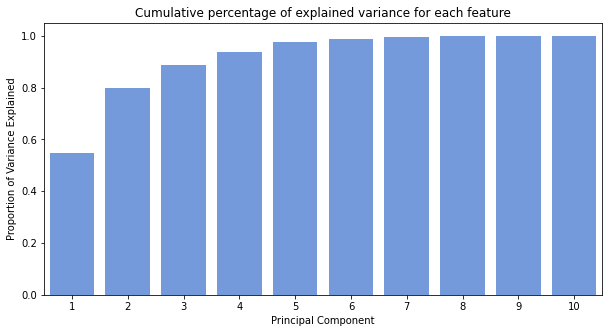

In [117]:
# Cumulative explained variance
plt.figure(figsize=(10,5));
sns.barplot(indeces, explained_var.cumsum(), color='cornflowerblue');
plt.title('Cumulative percentage of explained variance for each feature');
plt.ylabel('Proportion of Variance Explained');
plt.xlabel('Principal Component');

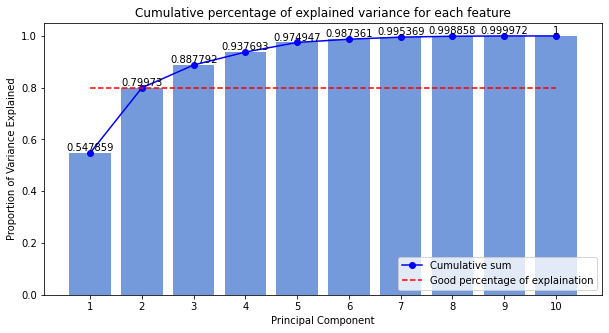

In [137]:
# A good percentage is around 80%
# How many PCs should we consider?

plt.figure(figsize=(10,5));
plt.title('Cumulative percentage of explained variance for each feature');
ax = sns.barplot(indeces, explained_var.cumsum(), color='cornflowerblue');
ax.bar_label(ax.containers[0]);
plt.plot(indeces-1, explained_var.cumsum(), 'bo-', label='Cumulative sum');
plt.plot([0.8]+ 0*np.arange(1,11), color='red', linestyle='--', label='Good percentage of explaination');
plt.ylabel('Proportion of Variance Explained');
plt.xlabel('Principal Component');
plt.legend(loc='lower right');

### **3.4.** Transformed dataset

In [152]:
# Transformed dataset (feat_std)
pca_data = pca.fit_transform(feat_std)
pca_data = pd.DataFrame(
                data    = pca_data,
                columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])
pca_data.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,5.219562,3.201611,-2.169431,-0.169127,1.512921,0.113024,-0.344381,-0.231728,-0.021963,-0.011248
1,1.726575,-2.538605,-1.018782,0.547058,0.312055,-0.934812,0.420552,-0.008336,-0.056122,-0.022972
2,3.966267,-0.549591,-0.323284,0.397614,-0.322593,0.271255,0.076439,-0.354738,0.020098,-0.022655
3,3.593551,6.898999,0.792135,-0.604296,0.242962,-0.616427,-0.067991,-0.100075,-0.043443,-0.053409
4,3.148321,-1.356878,-1.860597,-0.185089,0.311068,0.090698,0.307816,0.098970,-0.026551,0.034083


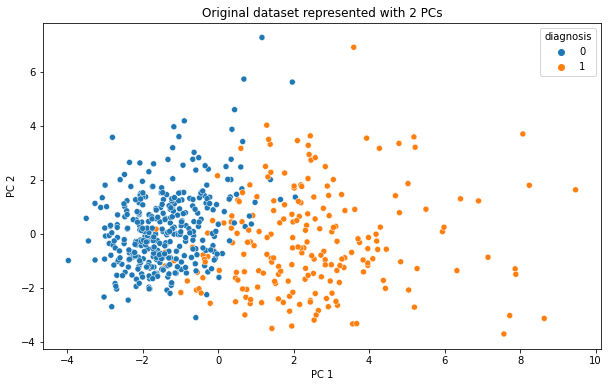

In [146]:
# Plot 2 PCs
plt.figure(figsize=(10,6));
sns.scatterplot(x='PC 1', y='PC 2', hue='diagnosis', data=pd.concat([pca_data, data['diagnosis']], axis=1));
plt.title('Original dataset represented with 2 PCs');

## **4.** t-SNE

### **4.1.** t-SNE fit

In [148]:
# Define and fit t-SNE directly in 2 dimensions
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform(feat_std);

### **4.2.** Transformed dataset

In [151]:
# Transformed dataset (feat_std)
tsne_data = pd.DataFrame(data=tsne, columns=['tSNE 1', 'tSNE 2'])
tsne_data.head()

,tSNE 1,tSNE 2
0,30.514256,-6.707991
1,16.182747,14.843477
2,27.978119,3.463194
3,20.571136,-16.751022
4,24.145468,4.770386


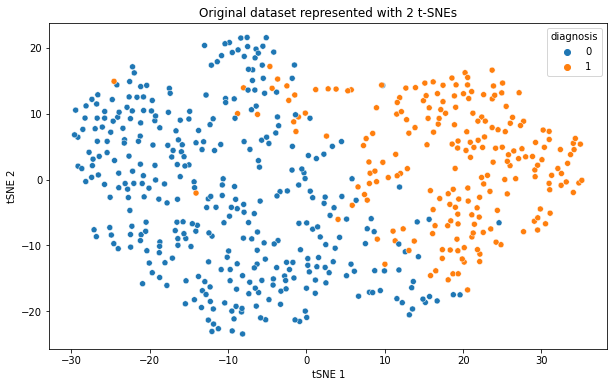

In [153]:
# Plot 2 t-SNEs
plt.figure(figsize=(10,6));
sns.scatterplot(x='tSNE 1', y='tSNE 2', hue='diagnosis', data=pd.concat([tsne_data, data['diagnosis']], axis=1));
plt.title('Original dataset represented with 2 t-SNEs');

## **5.** PCA vs. t-SNE

### **5.1.** Dataset 2-D visualization

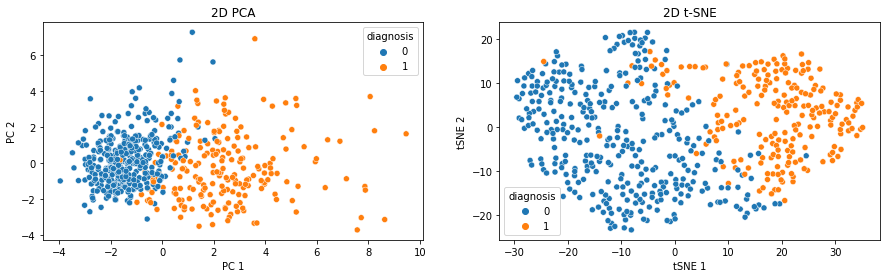

In [159]:
# Let's plot PCA and t-SNE
plt.figure(figsize=(15,4))

# PC
plt.subplot(1,2,1)
sns.scatterplot(x='PC 1', y='PC 2', hue='diagnosis', data=pd.concat([pca_data, data['diagnosis']], axis=1));
plt.title('2D PCA');

# t-SNE
plt.subplot(1,2,2)
sns.scatterplot(x='tSNE 1', y='tSNE 2', hue='diagnosis', data=pd.concat([tsne_data, data['diagnosis']],axis=1));
plt.title('2D t-SNE');

### **5.2.** (Extra) Logistic regression comparison

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [165]:
coefficients = {}

### PCA 
###----------------------------------------------------------------------------------------------------------------------------

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(pca_data, data['diagnosis'], test_size=1/3, shuffle=True, random_state=42)

# Model fitting
model = LogisticRegression(penalty='l2', C=100, max_iter=300, solver='liblinear', random_state=42)
model.fit(x_train, y_train);

# Coefficients
coefficients['pca'] = (model, np.append(model.coef_[0], model.intercept_[0]) )


### t-SNE 
###----------------------------------------------------------------------------------------------------------------------------

# Train-test splot
x_train, x_test, y_train, y_test = train_test_split(tsne_data, data['diagnosis'], test_size=1/3, shuffle=True, random_state=42)

# Model fitting 
model = LogisticRegression(penalty='l2', C=100, max_iter=300, solver='liblinear', random_state=42)
model.fit(x_train, y_train);

# Coefficients
coefficients['tsne'] = (model, np.append(model.coef_[0], model.intercept_[0]) )

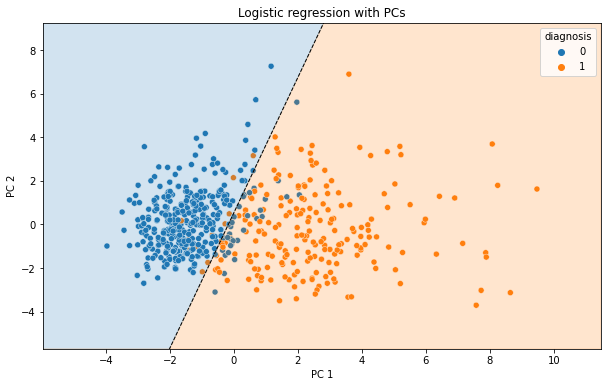

In [181]:
## Plot logistic regression boundary for PCs data
###--------------------------------------------------------------------------

# Add the 'diagnosis' column to 'pca_data'
pca_data['diagnosis'] = data['diagnosis']

# Coefficients
b = coefficients['pca'][1][2]
w1, w2 = coefficients['pca'][1][0:2]

# Calculate the intercept and gradient of the decision boundary
c = -b/w2
m = -w1/w2

# Plot limits
xmin, xmax = np.min(pca_data['PC 1'])-2, np.max(pca_data['PC 1'])+2
ymin, ymax = np.min(pca_data['PC 2'])-2, np.max(pca_data['PC 2'])+2
xd = np.array([xmin, xmax])
yd = m*xd + c

# Plot
plt.figure(figsize=(10,6))
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
sns.scatterplot(x='PC 1', y='PC 2', hue='diagnosis', data=pca_data);
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2);
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2);
plt.title('Logistic regression with PCs');

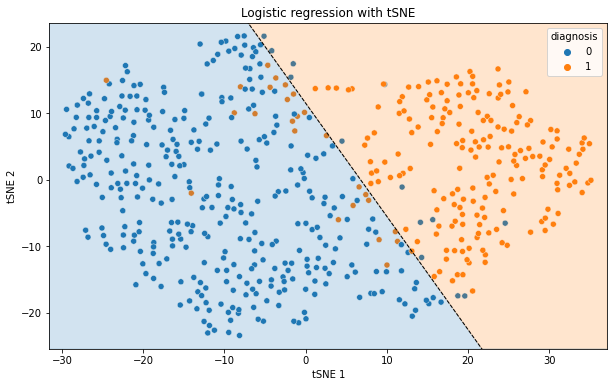

In [186]:
## Plot logistic regression boundary for t-SNE data
###--------------------------------------------------------------------------

# Add the 'diagnosis' column to 'tsne_data'
tsne_data['diagnosis'] = data['diagnosis']

# Coefficients
b = coefficients['tsne'][1][2]
w1, w2 = coefficients['tsne'][1][0:2]

# Calculate the intercept and gradient of the decision boundary
c = -b/w2
m = -w1/w2

# Plot limits
xmin, xmax = np.min(tsne_data['tSNE 1'])-2, np.max(tsne_data['tSNE 1'])+2
ymin, ymax = np.min(tsne_data['tSNE 2'])-2, np.max(tsne_data['tSNE 2'])+2
xd = np.array([xmin, xmax])
yd = m*xd + c

# Plot
plt.figure(figsize=(10,6))
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
sns.scatterplot(x='tSNE 1', y='tSNE 2', hue='diagnosis', data=tsne_data);
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2);
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2);
plt.title('Logistic regression with tSNE');